In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
df = pd.read_csv('Game Data - Data.csv')
df2 = df.astype(object).where(pd.notnull(df),None)
boys = df2.columns[1:]
played_games = df2['Game']
all_standings = [df2['Auðun'], 
                 df2['Árni'],
                 df2['Hlynur'], 
                 df2['Kári'],
                 df2['Skossi'],
                 df2['Sævar']]
all_nboys = len(all_standings)
all_ratings = [[1000], [1000], [1000], [1000], [1000], [1000]]
def expected_score(A, B):
    return 1/(1+np.power(10, (B-A)/400))


In [2]:
K=32
for i in range(len(played_games)):
    absentees = 0
    for j in range(all_nboys):
        if all_standings[j][i] == None:
            absentees+=1
    nplayers = 6 - absentees
    print(f"{played_games[i]} ({nplayers} players)")
    for j in range(all_nboys):
        print(f"  {boys[j].ljust(10)}")
        if all_standings[j][i] is None:
            all_ratings[j].append(all_ratings[j][i-1])
            continue
        expected_wins = 0
        for k in range(all_nboys):
            if j == k or all_standings[k][i] is None:
                continue
            expected_wins += expected_score(all_ratings[j][i], all_ratings[k][i])
        wins = nplayers-all_standings[j][i]
        rating_before = all_ratings[j][i]
        rating_change = K * (wins - expected_wins)
        rating_after = rating_before + rating_change
        print(f"    Score before: {rating_before:.2f}, expected score: {expected_wins:.2f}, actual score: {wins:.2f}")
        print(f"    Rating change: {rating_change:.2f}, New rating: {rating_after:.2f}")
        all_ratings[j].append(rating_after)
        
    
    print("\n")

Lords of Waterdeep (6 players)
  Auðun     
    Score before: 1000.00, expected score: 2.50, actual score: 4.00
    Rating change: 48.00, New rating: 1048.00
  Árni      
    Score before: 1000.00, expected score: 2.50, actual score: 3.00
    Rating change: 16.00, New rating: 1016.00
  Hlynur    
    Score before: 1000.00, expected score: 2.50, actual score: 1.00
    Rating change: -48.00, New rating: 952.00
  Kári      
    Score before: 1000.00, expected score: 2.50, actual score: 2.00
    Rating change: -16.00, New rating: 984.00
  Skossi    
    Score before: 1000.00, expected score: 2.50, actual score: 5.00
    Rating change: 80.00, New rating: 1080.00
  Sævar     
    Score before: 1000.00, expected score: 2.50, actual score: 0.00
    Rating change: -80.00, New rating: 920.00


Viticulture (6 players)
  Auðun     
    Score before: 1048.00, expected score: 2.90, actual score: 3.00
    Rating change: 3.13, New rating: 1051.13
  Árni      
    Score before: 1016.00, expected score:

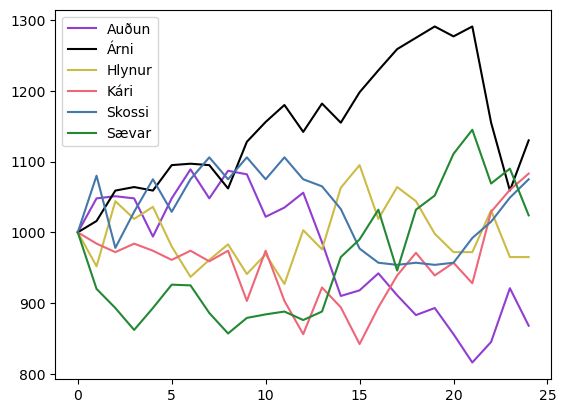

In [3]:
scores = {}
for i, boy in enumerate(boys):
    scores[boy] = [int(i) for i in all_ratings[i]]

df = pd.DataFrame(scores)
df.plot(color=['#913DD1', '#000000', '#CCBB44', '#EE6677', '#4477AA', '#228833'])
plt.show()
